<hr style="height:2px;">

# Demo: Apply trained CARE model for denoising of *SEM* data


The trained model is assumed to be located in the folder `models` with the name `my_SEM_model`.

More documentation is available at http://csbdeep.bioimagecomputing.com/doc/.



In [2]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread
from csbdeep.utils import Path, download_and_extract_zip_file, plot_some
from csbdeep.io import save_tiff_imagej_compatible
from csbdeep.models import CARE

<hr style="height:2px;">

# Raw low-SNR image and associated high-SNR ground truth

Plot the test stack pair and define its image axes, which will be needed later for CARE prediction.

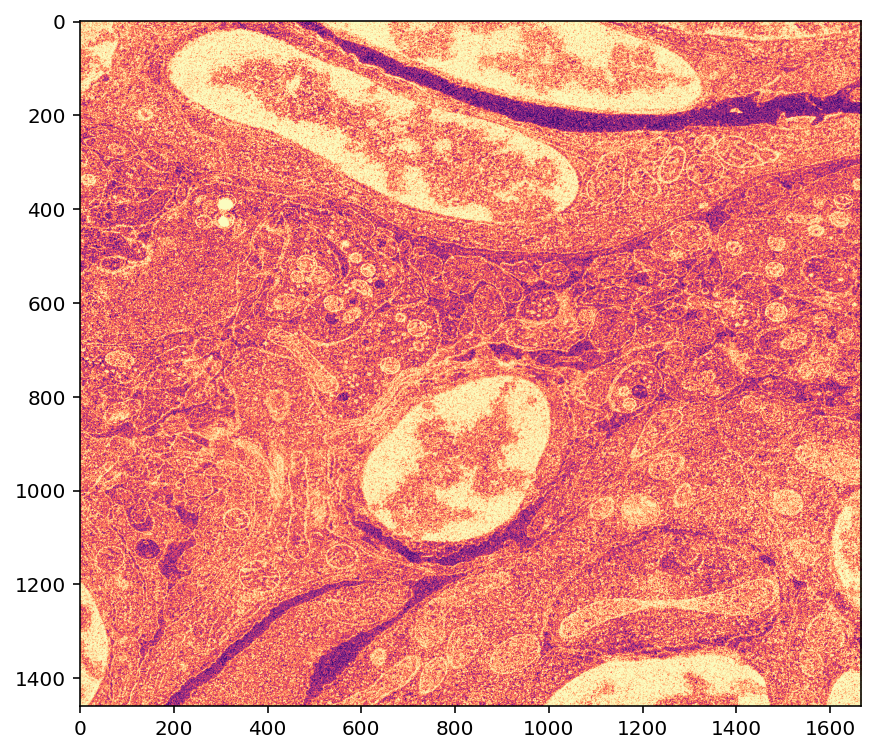

In [5]:
# Load data, we are looking at the 1.0 usec data (slice 3)
Xtest_1us=imread('data/SEM/test/test.tif').astype(np.float32)[3,:,:,np.newaxis]

#Show input, we are zooming in a bit.
plt.figure(figsize=(7,7))
plt.imshow(Xtest_1us[1500:,:,0],cmap="magma")
plt.show()


<hr style="height:2px;">

# CARE model

Load trained model (located in base directory `models` with name `my_SEM_model`) from disk.  
The configuration was saved during training and is automatically loaded when `CARE` is initialized with `config=None`.

In [6]:
model = CARE(config=None, name='my_SEM_model', basedir='models')

2021-09-27 00:44:49.968273: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-27 00:44:49.969312: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-27 00:44:49.993686: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-27 00:44:49.994238: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-09-27 00:44:49.994260: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-09-27 00:44:49.995908: I tensorflow/stream_executor/platform/default/dso_loade

Loading network weights from 'weights_best.h5'.


## Apply CARE network to raw image

Predict the restored image (image will be successively split into smaller tiles if there are memory issues).

In [7]:
%%time
restored_1us = model.predict(Xtest_1us, 'YXC')

2021-09-27 00:45:14.199896: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-27 00:45:14.220171: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499995000 Hz
2021-09-27 00:45:14.424575: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2021-09-27 00:45:15.837413: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


CPU times: user 3.35 s, sys: 680 ms, total: 4.03 s
Wall time: 4.14 s


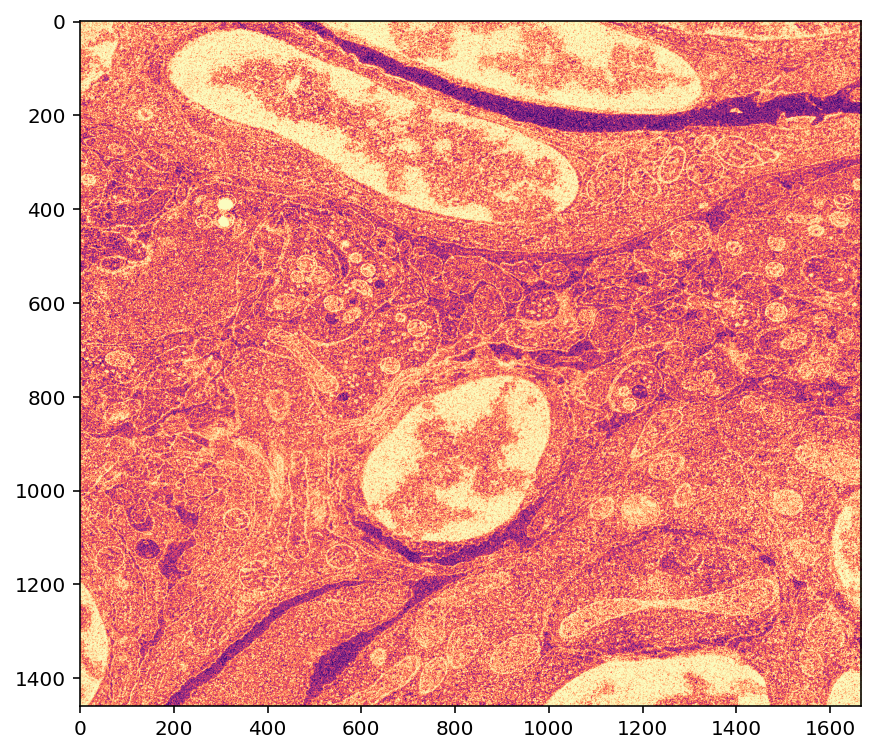

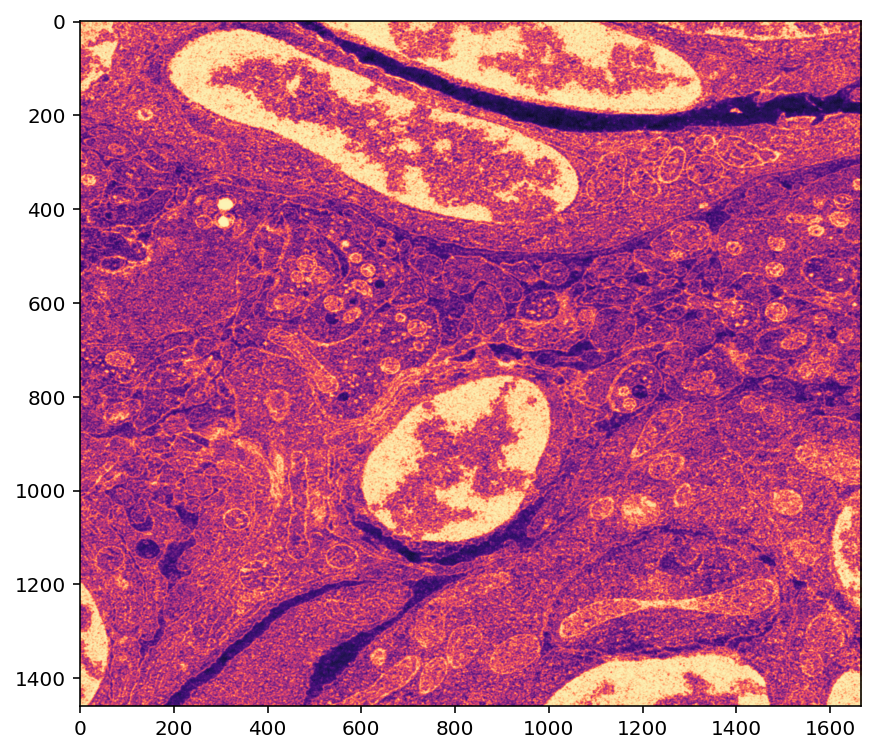

In [9]:
#Show input, we are zooming in a bit.
plt.figure(figsize=(7,7))
plt.imshow(Xtest[1500:,:,0],cmap="magma")
plt.show()

#Show result, we are zooming in a bit.
plt.figure(figsize=(7,7))
plt.imshow(restored[1500:,:,0],cmap="magma")
plt.show()

<hr style="height:2px;">

# Other scan times

Let's have a look at what happens if we apply this model to the other scan times.

In [24]:
Xtest = imread('data/SEM/test/test.tif').astype(np.float32)[:,:,:,np.newaxis]
restored = np.stack([model.predict(X[k], 'YXC') for k in range(X.shape[0])], axis=0)
scantimes = ["0.2us", "0.5us", "1us", "1us", "2.1us", "5us", "5us, avg of 4"]

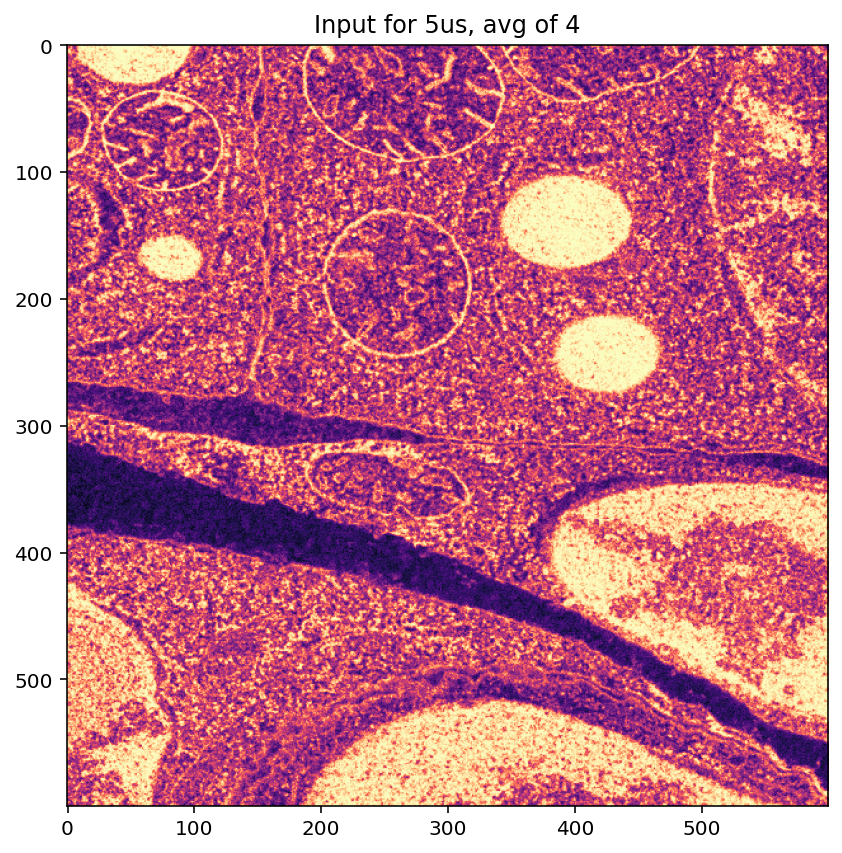

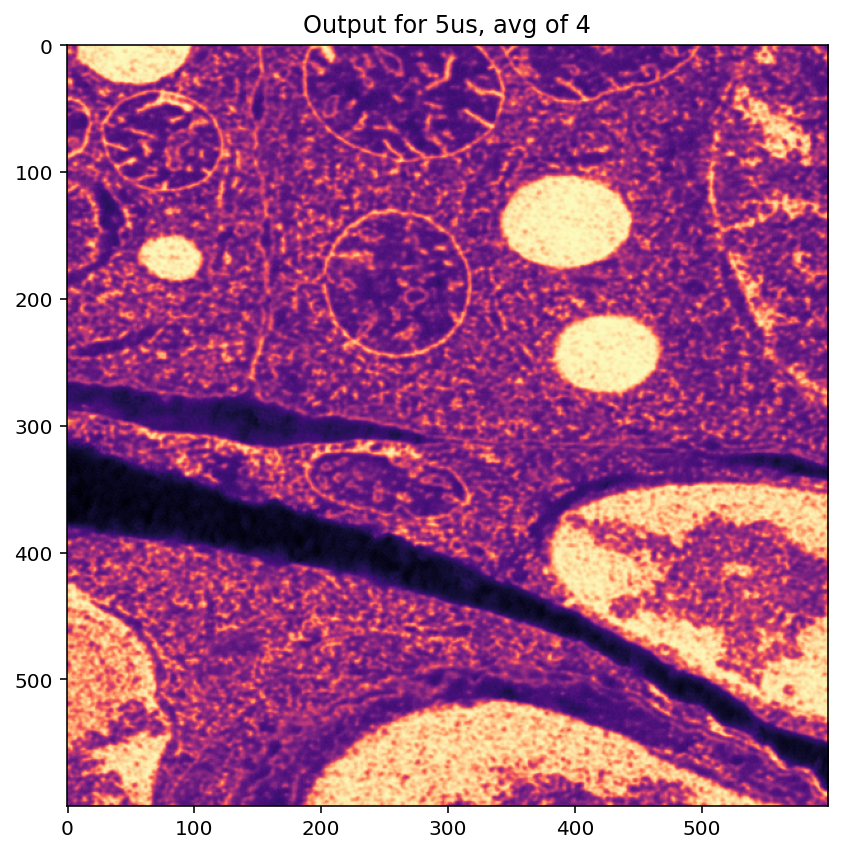

In [33]:
# pick an image/scantime
img_slice = 6
#Show input, we are zooming in a bit.
plt.figure(figsize=(7,7))
plt.imshow(Xtest[img_slice,1000:1600,0:600,0],cmap="magma")
plt.title("Input for {scantime:}".format(scantime=scantimes[img_slice]))
plt.show()

#Show result, we are zooming in a bit.
plt.figure(figsize=(7,7))
plt.imshow(restored[img_slice,1000:1600,0:600,0],cmap="magma")
plt.title("Output for {scantime:}".format(scantime=scantimes[img_slice]))
plt.show()


(2959, 1666, 1)